# Introduction to Modeling

In this notebook, the focus shifts to the modeling phase of the analysis, where various machine learning algorithms will be employed to predict income levels based on the preprocessed dataset. The primary goal is to evaluate the effectiveness of different models in accurately classifying individuals into income categories (<=50K or >50K).

## Objectives

1. **Model Selection**:
   - Three distinct algorithms will be explored: 
     - Logistic Regression
     - Decision Trees
     - Random Forests
   Each model brings its strengths and weaknesses, providing a comprehensive understanding of their performance on the dataset.

2. **Model Evaluation**:
   - The models will be assessed using appropriate metrics such as accuracy, precision, recall, and F1-score. This evaluation will help identify the best-performing model for predicting income levels.

3. **Hyperparameter Tuning**:
   - For the models that benefit from it, hyperparameter tuning will be conducted to optimize performance and enhance model accuracy.

4. **Comparison of Results**:
   - A comparative analysis of the models' performances will be conducted to draw insights on which algorithm is most effective for this specific task.

This modeling phase aims to leverage the cleaned and processed data to develop predictive insights into income levels, ultimately contributing to the overarching goal of understanding income determinants in the dataset.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

%run ../census_income/utils/pandas_missing_handler.py
%run ../census_income/utils/pandas_explorer.py

## Data load and first visualization:

In [72]:
path = '../census_income/data/preprocessed_data.csv'
df = pd.read_csv(path).drop(columns=['Unnamed: 0'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income_ >50K,capital_balance
0,0.452055,4,0.047277,12.0,0.800000,2,3,0,4,1,0.122449,38,0,0.0
1,0.287671,2,0.137244,8.0,0.533333,0,5,1,4,1,0.397959,38,0,0.0
2,0.493151,2,0.150212,6.0,0.400000,2,5,0,2,1,0.397959,38,0,0.0
3,0.150685,2,0.220703,12.0,0.800000,2,9,5,2,0,0.397959,4,0,0.0
4,0.273973,2,0.184109,13.0,0.866667,2,3,5,4,0,0.397959,38,0,0.0


# Model Training Overview

In this section, three models will be trained as initial benchmarks for income prediction:

1. **Logistic Regression**: A fundamental algorithm for binary classification that will provide a baseline for model performance.
  
2. **Decision Tree**: A versatile model that captures non-linear relationships and interactions among features, serving as a more complex alternative to logistic regression.

3. **Random Forest**: An ensemble method that builds upon the decision tree, enhancing predictive accuracy by aggregating the results of multiple trees.

All available features will be utilized for these models to establish a comprehensive starting point. Following this initial training, efforts will be made to improve model performance through feature selection, hyperparameter tuning, and other optimization techniques.


In [73]:
# Defining independent and target variables:
X = df.drop(columns=['income_ >50K'])
y = df['income_ >50K']

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Initializing the models:
LG_model = LogisticRegression(max_iter=1000)
DT_model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_split=10,criterion='entropy')
RF_model = RandomForestClassifier(random_state=42,n_estimators=100, max_depth=5, min_samples_split=10)

# Training the models:
LG_model.fit(X_train,y_train)
DT_model.fit(X_train,y_train)
RF_model.fit(X_train,y_train)

# Making predictions using LG_model
y_train_predict_LG = LG_model.predict(X_train)
y_test_predict_LG = LG_model.predict(X_test)

# Making predictions using DT_model
y_train_predict_DT = DT_model.predict(X_train)
y_test_predict_DT = DT_model.predict(X_test)

# Making predictions using RF_model
y_train_predict_RF = RF_model.predict(X_train)
y_test_predict_RF = RF_model.predict(X_test)
   

## Evaluating the initial Logistic Regression model:

In [74]:
# Accuracy Score:
print(f'Logistic Regression Accuracy Score using y_train: {accuracy_score(y_train,y_train_predict_LG)}')
print(f'Logistic Regression Accuracy Score using y_test: {accuracy_score(y_test,y_test_predict_LG)}')

# Confusion Matrix:
print(f'Logistic Regression Confusion Matrix using y_train:\n {confusion_matrix(y_train,y_train_predict_LG)}')
print(f'Logistic Regression Confusion Matrix using y_test:\n {confusion_matrix(y_test,y_test_predict_LG)}')

# Classification_report:
print(f'Logistic Regression Classification Report using y_train:\n {classification_report(y_train,y_train_predict_LG)}')
print(f'Logistic Regression Classification Report using y_test:\n {classification_report(y_test,y_test_predict_LG)}')


Logistic Regression Accuracy Score using y_train: 0.8035809018567639
Logistic Regression Accuracy Score using y_test: 0.7961808778676568
Logistic Regression Confusion Matrix using y_train:
 [[15786  1183]
 [ 3260  2391]]
Logistic Regression Confusion Matrix using y_test:
 [[5243  441]
 [1096  761]]
Logistic Regression Classification Report using y_train:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     16969
           1       0.67      0.42      0.52      5651

    accuracy                           0.80     22620
   macro avg       0.75      0.68      0.70     22620
weighted avg       0.79      0.80      0.79     22620

Logistic Regression Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      5684
           1       0.63      0.41      0.50      1857

    accuracy                           0.80      7541
   macro avg       0.73      0.67      0

- Accuracy Score 0.8 using train datasets and 0.79 using test datasets. These scores indicate that the model effectively generalizes to unseen data, maintaining a consistent level of accuracy across both datasets. 
- The logistic regression model perform considerably well having into account that every feature is being used.

## Evaluating the initial Decision Tree model:

In [75]:
# Accuracy Score:
print(f'Decision Tree Accuracy Score using y_train: {accuracy_score(y_train,y_train_predict_DT)}')
print(f'Decision Tree Accuracy Score using y_test: {accuracy_score(y_test,y_test_predict_DT)}')

# Confusion Matrix:
print(f'Decision Tree Confusion Matrix using y_train:\n {confusion_matrix(y_train,y_train_predict_DT)}')
print(f'Decision Tree Confusion Matrix using y_test:\n {confusion_matrix(y_test,y_test_predict_DT)}')

# Classification_report:
print(f'Decision Tree Classification Report using y_train:\n {classification_report(y_train,y_train_predict_DT)}')
print(f'Decision Tree Classification Report using y_test:\n {classification_report(y_test,y_test_predict_DT)}')

Decision Tree Accuracy Score using y_train: 0.8434571175950486
Decision Tree Accuracy Score using y_test: 0.8439199045219467
Decision Tree Confusion Matrix using y_train:
 [[16184   785]
 [ 2756  2895]]
Decision Tree Confusion Matrix using y_test:
 [[5414  270]
 [ 907  950]]
Decision Tree Classification Report using y_train:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16969
           1       0.79      0.51      0.62      5651

    accuracy                           0.84     22620
   macro avg       0.82      0.73      0.76     22620
weighted avg       0.84      0.84      0.83     22620

Decision Tree Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5684
           1       0.78      0.51      0.62      1857

    accuracy                           0.84      7541
   macro avg       0.82      0.73      0.76      7541
weighted avg       0.8

## Evaluating the initial Random Forest model:

In [76]:
# Accuracy Score:
print(f'Random Forest Accuracy Score using y_train: {accuracy_score(y_train,y_train_predict_RF)}')
print(f'Random Forest Accuracy Score using y_test: {accuracy_score(y_test,y_test_predict_RF)}')

# Confusion Matrix:
print(f'Random Forest Confusion Matrix using y_train:\n {confusion_matrix(y_train,y_train_predict_RF)}')
print(f'Random Forest Confusion Matrix using y_test:\n {confusion_matrix(y_test,y_test_predict_RF)}')

# Classification_report:
print(f'Random Forest Classification Report using y_train:\n {classification_report(y_train,y_train_predict_RF)}')
print(f'Random Forest Classification Report using y_test:\n {classification_report(y_test,y_test_predict_RF)}')

Random Forest Accuracy Score using y_train: 0.842263483642794
Random Forest Accuracy Score using y_test: 0.840339477522875
Random Forest Confusion Matrix using y_train:
 [[16197   772]
 [ 2796  2855]]
Random Forest Confusion Matrix using y_test:
 [[5408  276]
 [ 928  929]]
Random Forest Classification Report using y_train:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16969
           1       0.79      0.51      0.62      5651

    accuracy                           0.84     22620
   macro avg       0.82      0.73      0.76     22620
weighted avg       0.84      0.84      0.83     22620

Random Forest Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      5684
           1       0.77      0.50      0.61      1857

    accuracy                           0.84      7541
   macro avg       0.81      0.73      0.75      7541
weighted avg       0.83 

## Initial Model Results

In the initial testing phase, three different models were trained: **Logistic Regression**, **Decision Tree**, and **Random Forest**. Among these, it was observed that the **Logistic Regression** model performed the worst in terms of accuracy and associated metrics.

Given this outcome, it has been decided to focus the subsequent tests on optimizing and evaluating the performance of the **Decision Tree** and **Random Forest** models, which demonstrated superior performance. This will allow for exploring and tuning their hyperparameters to further improve the predictive capacity of the selected models.


## Selecting the Most Important Features

### Correlation analysis:

In [77]:
df.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income_ >50K,capital_balance
age,1.000000,0.080548,-0.076511,0.044334,0.043525,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.101599,-0.001905,0.242000,0.002921
workclass,0.080548,1.000000,-0.032395,0.038527,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.050738,0.007644,0.018103,0.016143
fnlwgt,-0.076511,-0.032395,1.000000,-0.046623,-0.044954,0.032197,0.000152,0.009289,-0.023882,0.025387,-0.022889,-0.066709,-0.008978,0.007772
education,0.044334,0.038527,-0.046623,1.000000,0.994120,-0.064117,0.087427,-0.093073,0.033066,0.007143,0.153381,0.092025,0.335024,0.015891
education_num,0.043525,0.037729,-0.044954,0.994120,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.152528,0.091547,0.335317,0.015103
marital_status,-0.276378,-0.034338,0.032197,-0.064117,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.189004,-0.025911,-0.193504,0.001034
occupation,-0.005680,0.015719,0.000152,0.087427,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.018362,-0.003470,0.051551,0.002382
relationship,-0.246456,-0.067401,0.009289,-0.093073,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.257851,-0.010806,-0.251009,0.013145
race,0.023373,0.044700,-0.023882,0.033066,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.048533,0.124511,0.071666,-0.009288
gender,0.081992,0.074917,0.025387,0.007143,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.231272,0.000612,0.216715,-0.006208


- The correlation matrix indicates that 'education' and 'education_num' have a correlation coefficient of 0.994, which suggests that the information they provide is nearly identical. Therefore, it is necessary to remove one of them.

In [78]:
df.drop(columns=['education'], inplace=True)

## Feature importances analysis:

In [79]:
feature_importances_df = pd.DataFrame(
    {'feature':list(X.columns),'importance':RF_model.feature_importances_}).sort_values('importance', ascending=False)

feature_importances_df

,feature,importance
7,relationship,0.268921
12,capital_balance,0.195986
5,marital_status,0.157685
4,education_num,0.136993
3,education,0.122662
0,age,0.052749
10,hours_per_week,0.029328
9,gender,0.018129
6,occupation,0.012068
1,workclass,0.002398


- Features witch the least 'importance' for the model are:
-   age	0.052749
-	hours_per_week	0.029328
-	gender	0.018129
-	occupation	0.012068
-	workclass	0.002398
-	fnlwgt	0.001425
-	native_country	0.000915
-	race	0.000741

### Removing from the X the Features with the Least Importance:
- fnlwgt
- capital_balance

In [80]:
X = df[['relationship','capital_balance','marital_status','education_num']]
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Initializing the models:
DT_model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_split=10,criterion='entropy')
RF_model = RandomForestClassifier(random_state=42,n_estimators=100, max_depth=5, min_samples_split=10)

# Training the models:
DT_model.fit(X_train,y_train)
RF_model.fit(X_train,y_train)


# Making predictions using DT_model
y_train_predict_DT = DT_model.predict(X_train)
y_test_predict_DT = DT_model.predict(X_test)

# Making predictions using RF_model
y_train_predict_RF = RF_model.predict(X_train)
y_test_predict_RF = RF_model.predict(X_test)


## Decision Tree:


In [81]:
# Accuracy Score:
print(f'Decision Tree Accuracy Score using y_train: {accuracy_score(y_train,y_train_predict_DT)}')
print(f'Decision Tree Accuracy Score using y_test: {accuracy_score(y_test,y_test_predict_DT)}')

# Confusion Matrix:
print(f'Decision Tree Confusion Matrix using y_train:\n {confusion_matrix(y_train,y_train_predict_DT)}')
print(f'Decision Tree Confusion Matrix using y_test:\n {confusion_matrix(y_test,y_test_predict_DT)}')

# Classification_report:
print(f'Decision Tree Classification Report using y_train:\n {classification_report(y_train,y_train_predict_DT)}')
print(f'Decision Tree Classification Report using y_test:\n {classification_report(y_test,y_test_predict_DT)}')

Decision Tree Accuracy Score using y_train: 0.8465075154730327
Decision Tree Accuracy Score using y_test: 0.8496220660389868
Decision Tree Confusion Matrix using y_train:
 [[16067   902]
 [ 2570  3081]]
Decision Tree Confusion Matrix using y_test:
 [[5383  301]
 [ 833 1024]]
Decision Tree Classification Report using y_train:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     16969
           1       0.77      0.55      0.64      5651

    accuracy                           0.85     22620
   macro avg       0.82      0.75      0.77     22620
weighted avg       0.84      0.85      0.84     22620

Decision Tree Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90      5684
           1       0.77      0.55      0.64      1857

    accuracy                           0.85      7541
   macro avg       0.82      0.75      0.77      7541
weighted avg       0.8

## Random Forest:

In [82]:
# Accuracy Score:
print(f'Random Forest Accuracy Score using y_train: {accuracy_score(y_train,y_train_predict_RF)}')
print(f'Random Forest Accuracy Score using y_test: {accuracy_score(y_test,y_test_predict_RF)}')

# Confusion Matrix:
print(f'Random Forest Confusion Matrix using y_train:\n {confusion_matrix(y_train,y_train_predict_RF)}')
print(f'Random Forest Confusion Matrix using y_test:\n {confusion_matrix(y_test,y_test_predict_RF)}')

# Classification_report:
print(f'Random Forest Classification Report using y_train:\n {classification_report(y_train,y_train_predict_RF)}')
print(f'Random Forest Classification Report using y_test:\n {classification_report(y_test,y_test_predict_RF)}')

Random Forest Accuracy Score using y_train: 0.8481432360742706
Random Forest Accuracy Score using y_test: 0.8506829332979711
Random Forest Confusion Matrix using y_train:
 [[16121   848]
 [ 2587  3064]]
Random Forest Confusion Matrix using y_test:
 [[5393  291]
 [ 835 1022]]
Random Forest Classification Report using y_train:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     16969
           1       0.78      0.54      0.64      5651

    accuracy                           0.85     22620
   macro avg       0.82      0.75      0.77     22620
weighted avg       0.84      0.85      0.84     22620

Random Forest Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5684
           1       0.78      0.55      0.64      1857

    accuracy                           0.85      7541
   macro avg       0.82      0.75      0.78      7541
weighted avg       0.8

- It was observed that the **Decision Tree** model performed the worst in terms of accuracy and associated metrics.
- Given this outcome, the focus will be shifted to optimizing and evaluating the performance of the Random Forest models, which demonstrated superior performance. This approach will allow for the exploration and tuning of hyperparameters to further enhance the predictive capacity of the selected model.

## Applying Grid Search:

Best hyperparameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 23}
Random Forest Accuracy Score using y_train: 0.8590
Random Forest Accuracy Score using y_test: 0.8564
Random Forest Confusion Matrix using y_test:
 [[5383  301]
 [ 782 1075]]
Random Forest Classification Report using y_test:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5684
           1       0.78      0.58      0.67      1857

    accuracy                           0.86      7541
   macro avg       0.83      0.76      0.79      7541
weighted avg       0.85      0.86      0.85      7541

AUC: 0.8976


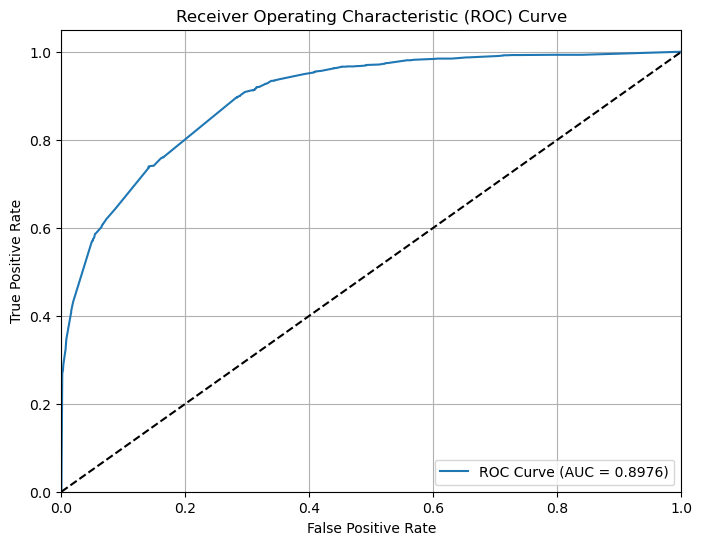

In [107]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space (grid)
param_grid = {
    'n_estimators': [18, 19, 23],  
    'max_depth': [20, 21, 22],      
    'min_samples_split': [2, 3, 4], 
    'min_samples_leaf': [1, 2, 3, 4]  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using Grid Search
grid_search.fit(X_train, y_train)

# Display the best combination of hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the model with the best parameters on the test data
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)

# Predict using the best model
y_train_predict_FM = best_rf_model.predict(X_train)
y_test_predict_FM = best_rf_model.predict(X_test)

# Accuracy Score:
print(f'Random Forest Accuracy Score using y_train: {accuracy_score(y_train, y_train_predict_FM):.4f}')
print(f'Random Forest Accuracy Score using y_test: {accuracy_score(y_test, y_test_predict_FM):.4f}')

# Confusion Matrix:
print(f'Random Forest Confusion Matrix using y_test:\n {confusion_matrix(y_test, y_test_predict_FM)}')

# Classification Report:
print(f'Random Forest Classification Report using y_test:\n {classification_report(y_test, y_test_predict_FM)}')

# Get predicted probabilities for the positive class
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.4f}')

# Calculate the values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Conclusions

In this notebook, various modeling techniques were implemented to predict the income class based on demographic and employment features from the dataset. The following key steps were undertaken:

 **Random Forest Optimization**: 
   - The **Random Forest** model exhibited superior performance compared to the other models. To further enhance its predictive capability, a systematic hyperparameter tuning was conducted using Grid Search.
   - A parameter grid was defined, exploring various values for hyperparameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

 **Performance Metrics**:
   - The best hyperparameters were identified through cross-validation, and the model was evaluated on both training and testing datasets.
   - Key performance metrics, including accuracy scores, confusion matrices, and classification reports, were generated to assess the model’s effectiveness.

 **ROC AUC Evaluation**:
   - The model's performance was further evaluated using the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric, providing insights into the trade-offs between true positive rates and false positive rates.

  ### Final Evaluation Metrics Commentary

1. **Best Hyperparameters**:
   - The best hyperparameters identified through Grid Search are `max_depth: 21`, `min_samples_leaf: 1`, `min_samples_split: 4`, and `n_estimators: 23`. These values suggest a moderately deep tree with flexibility in splitting while maintaining a reasonable number of trees, which can help balance bias and variance in the model.

2. **Accuracy Scores**:
   - The Random Forest model achieved an accuracy score of **0.8590** on the training set and **0.8564** on the test set. This indicates that the model performs consistently well across both datasets, suggesting it is neither overfitting nor underfitting significantly.

3. **Confusion Matrix**:
   - The confusion matrix reveals that the model made **5383 true negatives** (correctly predicted income ≤50K), **1075 true positives** (correctly predicted income >50K), **782 false negatives** (predicted ≤50K but actual >50K), and **301 false positives** (predicted >50K but actual ≤50K). 
   - The model performs well in identifying the majority class (income ≤50K) but has a higher number of false negatives for the minority class (income >50K), indicating room for improvement in detecting positive cases.

4. **Classification Report**:
   - The precision for class **0** (income ≤50K) is **0.87**, while for class **1** (income >50K), it is **0.78**. This shows that the model is more reliable in predicting the majority class than the minority class. 
   - The recall for class **0** is **0.95**, which is excellent, indicating that the model captures most of the true instances of income ≤50K. However, the recall for class **1** is only **0.58**, indicating that a significant portion of the actual positive instances is being missed.
   - The **F1-score** for class **1** is **0.67**, which is a balanced measure of precision and recall, but it highlights that there is still a need to improve the detection of the positive class.

5. **Macro and Weighted Averages**:
   - The macro average precision of **0.83**, recall of **0.76**, and F1-score of **0.79** indicate a general performance level across both classes, treating them equally regardless of their support.
   - The weighted average scores (precision **0.85**, recall **0.86**, F1-score **0.85**) reflect the model's performance considering the imbalance in class distribution, providing a more representative view of model performance in a real-world context.

6. **AUC Score**:
   - The AUC score of **0.8976** indicates a strong ability of the model to distinguish between the two classes. An AUC value closer to 1 suggests that the model is effective in ranking positive instances higher than negative ones.

Overall, the Random Forest model demonstrates robust performance with good accuracy and AUC scores. However, the significant difference in recall and F1-scores between the two classes suggests that additional techniques, such as further hyperparameter tuning, feature engineering, or alternative resampling methods, may be necessary to enhance the model's ability to identify the minority class (income >50K) effectively.

